In [8]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import layers,models
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import pandas as pd

In [13]:
dataset = pd.read_excel('Date_Fruit_Datasets.xlsx')
print(dataset)
dataset.info()

       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0      0.9947       424428  0.

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()                                                 #labelencoding
dataset["Class"] = le.fit_transform(dataset["Class"])
print(dataset)

       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
0      0.9947       424428  0.

In [24]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']
print(X)


       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  SkewRB  KurtosisRR  \
0      0.9947       424428  0.7831

In [48]:
XTrain , XTest, yTrain, yTest = train_test_split(X,y,test_size=0.2,random_state=42)
XTrain , XVal, yTrain, yVal = train_test_split(XTrain,yTrain,test_size=0.3,random_state=21)

scaler = StandardScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.fit_transform(XTest)
XVal = scaler.fit_transform(XVal)

In [49]:
model = models.Sequential()
model.add(layers.Dense(50,activation='relu',input_shape=(34,)))
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(7,activation='softmax'))

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(XTrain,yTrain,epochs=100,validation_data=(XVal,yVal))

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 1.7640 - accuracy: 0.4223 - val_loss: 1.5814 - val_accuracy: 0.5417
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 1.4233 - accuracy: 0.6454 - val_loss: 1.3241 - val_accuracy: 0.5972
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 1.1635 - accuracy: 0.6574 - val_loss: 1.0968 - val_accuracy: 0.6250
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9479 - accuracy: 0.6653 - val_loss: 0.9096 - val_accuracy: 0.6389
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7879 - accuracy: 0.7331 - val_loss: 0.7779 - val_accuracy: 0.6852
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.7709 - val_loss: 0.6754 - val_accuracy: 0.7269
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5826 - accuracy: 0.8008 - val_loss: 0.5975 - val_accuracy: 0.7685
Epoch 8/100


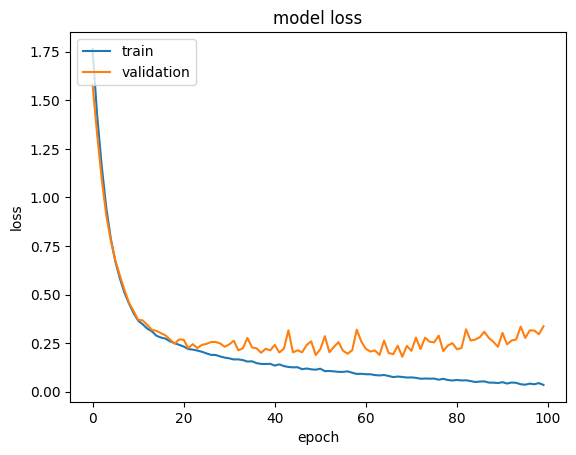

In [51]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.83      0.75      0.79        20
           2       0.96      0.94      0.95        50
           3       0.62      1.00      0.77        10
           4       0.97      0.86      0.91        35
           5       1.00      1.00      1.00        33
           6       0.83      0.95      0.88        20

    accuracy                           0.91       180
   macro avg       0.89      0.90      0.89       180
weighted avg       0.92      0.91      0.91       180



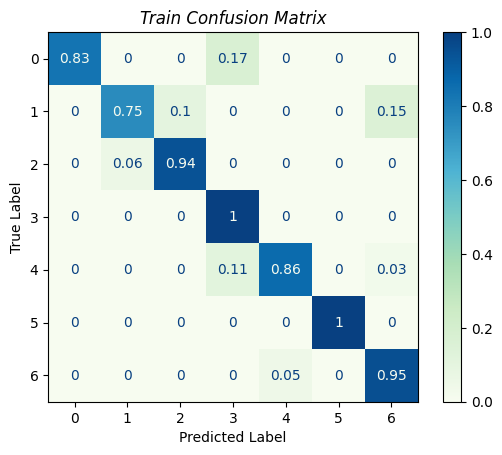

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
yTestPred = model.predict(XTest)
yTestPred=np.argmax(yTestPred,axis=1)
yTest = np.asarray(yTest)
print(classification_report(yTest,yTestPred))
cm = (confusion_matrix(yTest,yTestPred , normalize="true").round(2))
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format='g')
plt.title(f"Train Confusion Matrix",style='italic')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()